# Download the Iris flower dataset or any other dataset into a DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris ).

In [3]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()


Saving iris.data to iris.data


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# List down the features and their types (e.g., numeric, nominal) available in the dataset.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
print(df.info())

numeric_features = df.select_dtypes(include=['int', 'float']).columns
nominal_features = df.select_dtypes(include=['object']).columns

print("Numeric Features:")
for feature in numeric_features:
    print("-", feature)

print("\nNominal Features:")
for feature in nominal_features:
    print("-", feature)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
Numeric Features:
- 5.1
- 3.5
- 1.4
- 0.2

Nominal Features:
- Iris-setosa


# Create a histogram for each feature in the dataset to illustrate the feature distributions.

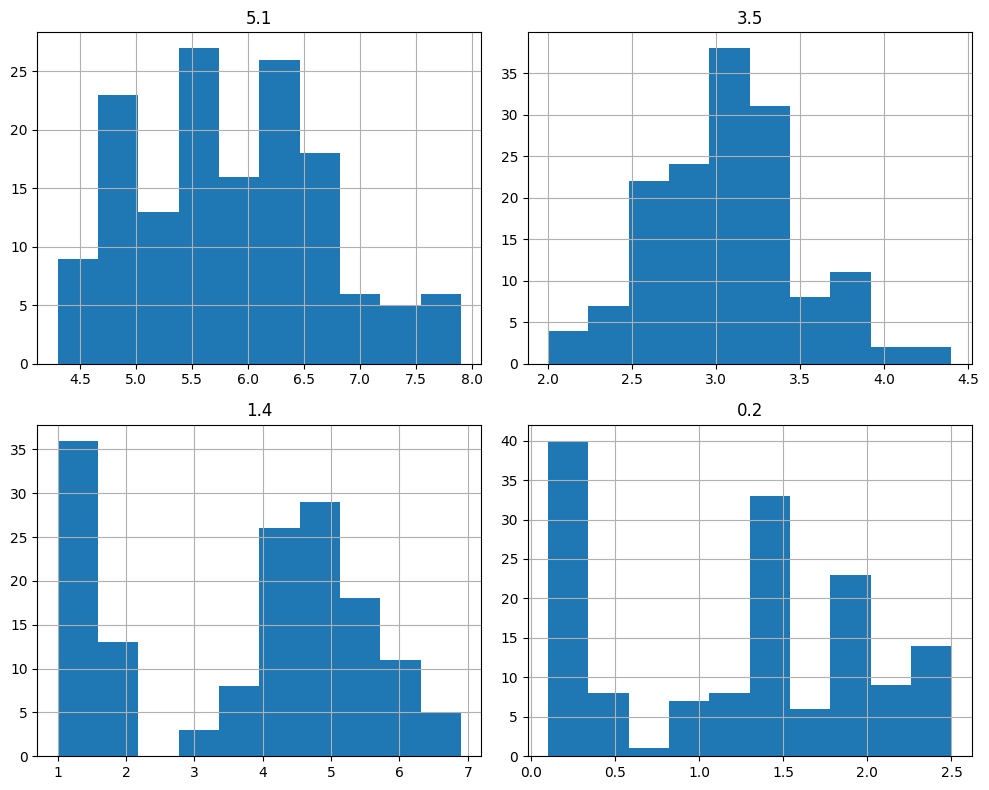

In [6]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Create a Box Plot for each dataset

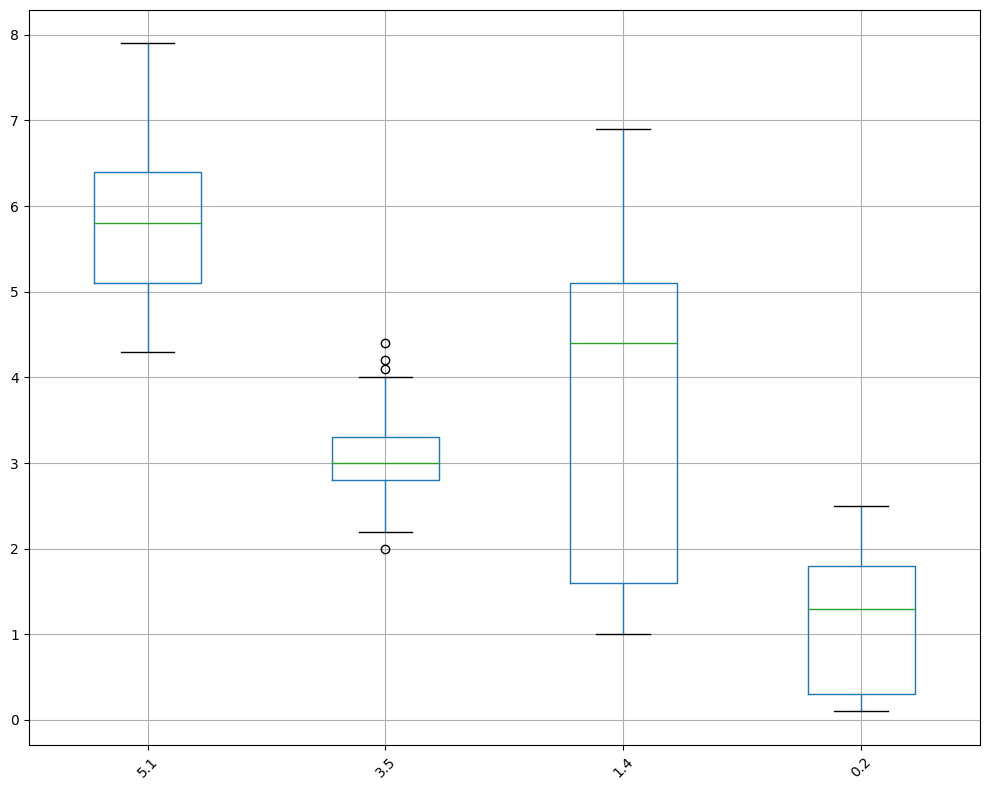

In [7]:
import matplotlib.pyplot as plt

df.boxplot(figsize=(10, 8))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Compare distributions and identify outliers.

In [12]:
import os

print(os.listdir())


['.config', 'iris.data', 'sample_data']


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

iris_data = pd.read_csv("iris.data", header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

Q1 = iris_data.quantile(0.25)
Q3 = iris_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((iris_data < (Q1 - 1.5 * IQR)) | (iris_data > (Q3 + 1.5 * IQR))).any(axis=1)

print("Rows containing outliers:")
print(iris_data[outliers])


Rows containing outliers:
    sepal_length  sepal_width  petal_length  petal_width            class
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor


<ipython-input-14-40fe229a5047>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = iris_data.quantile(0.25)
<ipython-input-14-40fe229a5047>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = iris_data.quantile(0.75)
<ipython-input-14-40fe229a5047>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((iris_data < (Q1 - 1.5 * IQR)) | (iris_data > (Q3 + 1.5 * IQR))).any(axis=1)


<ipython-input-17-12a5d2eb7c62>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = iris_data.quantile(0.25)
<ipython-input-17-12a5d2eb7c62>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = iris_data.quantile(0.75)
<ipython-input-17-12a5d2eb7c62>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((iris_data < (Q1 - 1.5 * IQR)) | (iris_data > (Q3 + 1.5 * IQR))).any(axis=1)


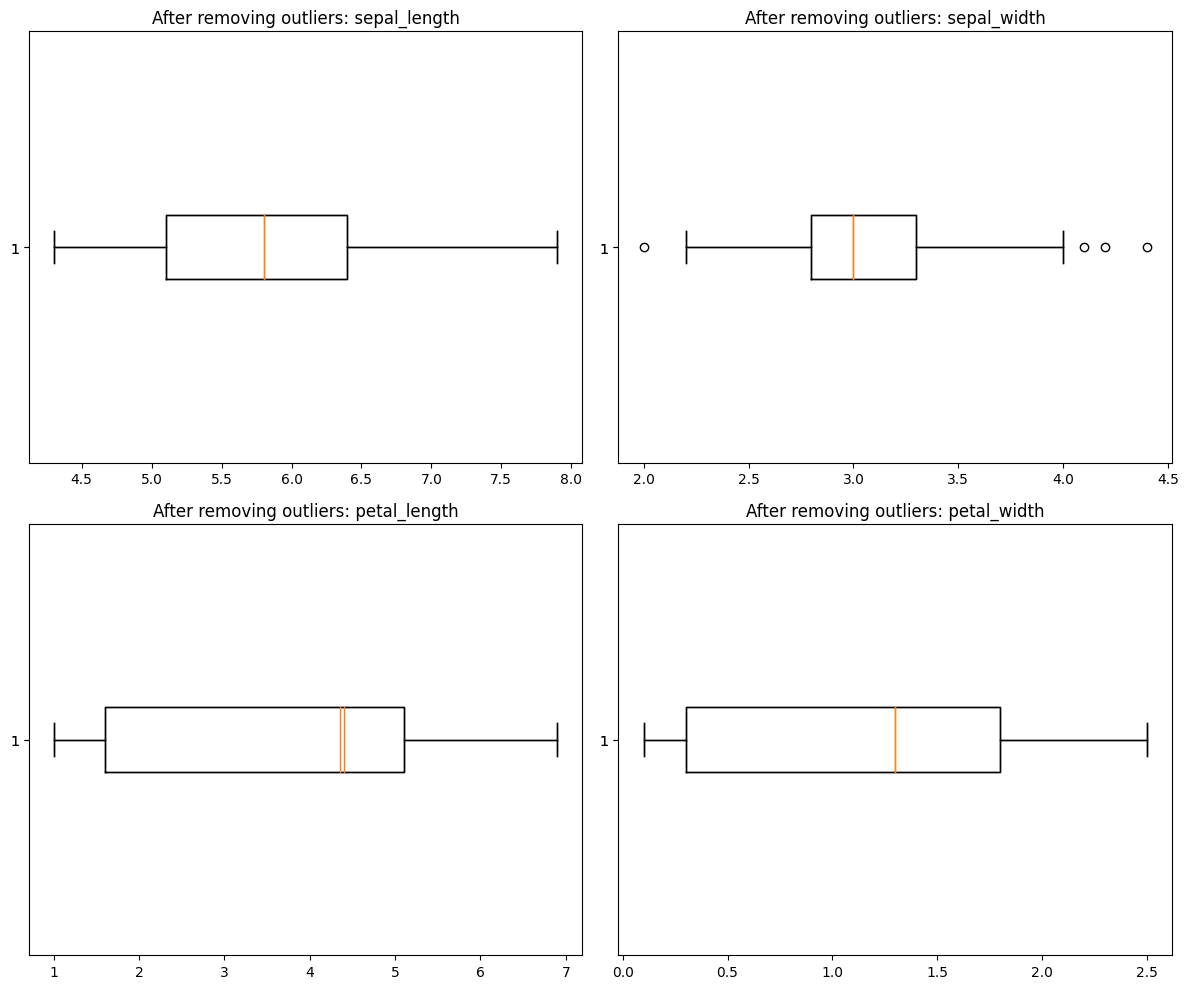

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

iris_data = pd.read_csv("iris.data", header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

Q1 = iris_data.quantile(0.25)
Q3 = iris_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((iris_data < (Q1 - 1.5 * IQR)) | (iris_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the outliers
filtered_data = iris_data[~outliers]

# Create subplots for comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot boxplots for each feature before and after removing outliers
for i, ax in enumerate(axs.flatten()):
    col = iris_data.columns[i]

    # Before removing outliers
    ax.boxplot(iris_data[col], vert=False)
    ax.set_title(f"Before removing outliers: {col}")

    # After removing outliers
    ax.boxplot(filtered_data[col], vert=False)
    ax.set_title(f"After removing outliers: {col}")

plt.tight_layout()
plt.show()
